In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp


train_set = np.load("./data/simu_20000_0.1_90_140_train.npy")
test_set = np.load("./data/simu_10000_0.1_141_178_test.npy")

(0.0, 100.0)

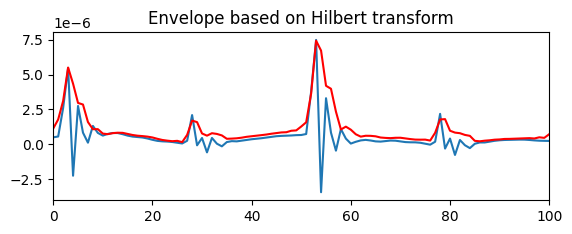

In [22]:
fs = 100.0 #sampling frequency
duration = 10.0 #duration of the signal
t = np.arange(int(fs*duration)) / fs #time base

a_t =  1.0 + 0.7 * np.sin(2.0*np.pi*3.0*t)#information signal
c_t = chirp(t, 20.0, t[-1], 80) #chirp carrier
x = a_t * c_t #modulated signal

x = train_set[523,:1000]

plt.subplot(2,1,1)
plt.plot(x) #plot the modulated signal

z= hilbert(x) #form the analytical signal
inst_amplitude = np.abs(z) #envelope extraction
inst_phase = np.unwrap(np.angle(z))#inst phase
inst_freq = np.diff(inst_phase)/(2*np.pi)*fs #inst frequency

#去除包络上的毛刺
window_size = 2  # Adjust the window size as needed
smoothed_envelope = np.convolve(inst_amplitude, np.ones(window_size)/window_size, mode='same')

#Regenerate the carrier from the instantaneous phase
regenerated_carrier = np.cos(inst_phase)

# plt.plot(inst_amplitude,'r'); #overlay the extracted envelope
plt.plot(smoothed_envelope,'r')
plt.title('Envelope based on Hilbert transform')
# plt.xlabel('n')
# plt.ylabel('x(t)')
plt.xlim(0,100)
# plt.subplot(2,1,2)
# plt.plot(regenerated_carrier)
# plt.title('Extracted carrier or TFS')
# plt.xlabel('n')
# plt.ylabel('cos[\omega(t)]')